# Visualizing Uber and Lyft trip distances



Let's look at a dataset of Uber and Lyft trips in Boston. 

* The dataset is in the file "fhv_rides.csv". Only the economic versions of the services (UberX and Lyft Economy) are included.

In [3]:
import pandas as pd
rides = pd.read_csv("https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/fhv_rides.csv")
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id
0,1.08,Lyft,1543432987778,Northeastern University,Back Bay,7.0,1.0,d859ec69-b3ff-4af8-9abd-441e31430c94
1,1.11,Uber,1544728503935,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3
2,2.48,Uber,1544697611531,South Station,Beacon Hill,8.5,1.0,4149295f-4534-4712-b2cf-160308528c75
3,3.24,Lyft,1543774987499,Northeastern University,North Station,11.0,1.0,174b960d-58f1-4dfd-8672-8b43f13726a7
4,2.94,Uber,1544789105468,Fenway,North Station,9.5,1.0,c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a


**Question**: Do Uber riders or Lyft riders have longer trips?

We can seperate Uber trips from Lyft trips using filtering

In [6]:
rides_uber = rides[rides['cab_type']=='Uber']
rides_lyft = rides[rides['cab_type']=='Lyft']

In [7]:
rides_lyft.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id
0,1.08,Lyft,1543432987778,Northeastern University,Back Bay,7.0,1.0,d859ec69-b3ff-4af8-9abd-441e31430c94
3,3.24,Lyft,1543774987499,Northeastern University,North Station,11.0,1.0,174b960d-58f1-4dfd-8672-8b43f13726a7
5,1.76,Lyft,1544963414097,South Station,North Station,9.0,1.0,104ced5c-1c1b-4021-94bb-b21af453399a
6,1.23,Lyft,1543852985839,Theatre District,Haymarket Square,7.0,1.0,f76a05b7-60a7-4df5-94b9-de16881691ca
9,1.16,Lyft,1543831981297,Beacon Hill,Haymarket Square,7.0,1.0,09740fbe-a03b-48df-a25a-6a01d4fc30e7


In this course, many of the visualizations are enabled by the `pyplot` module in the `matplotlib` library. `pylot` is often imported as `plt`. It includes many functions for different kinds of charts.

In [8]:
import matplotlib.pyplot as plt

## What plot should we use to visualize the distribution of trip distances?

# Using the histogram

In `matplotlib.pyplot`, the function `hist()` creates histograms. The main input argument is the observed values of a variable. After using the histogram, we should use the `plt.show()` function 

Please keep in mind that many of the ideas that we discuss here (e.g., adding legends, titles, grid lines, ticks etc.) for histograms can be applied to other charts that can be created using `pyplot`.

Let's visualize Uber's trip distances using a histogram.

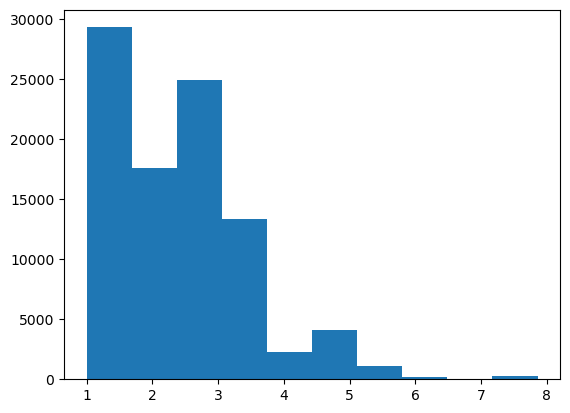

In [9]:
plt.hist(rides['distance'])
plt.show()

## Using keyword arguments to change the look of the chart

The kwargs (short for keyword arguments) is a way to pass arguments to a function by explicitly specifying the **parameter name along with the value**. They customizes different aspects of a plot, such as color, number of bins to show, etc.

You can find these under **kwargs in the documentation for the `hist()` can be found in the [matplotlib.pyplot.hist documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

We can:
* change the color using `color=`, color of the bar edges using 'edgecolor='
* change the number of bins by `bins=`
* use `density=True` to let the height of the bars be the percentage of values in the bins, instead of the count of values in the bins
* use `plt.title()` to define the title
* use `plt.xlabel()` and `plt.ylabel()` for the axis labels 
* use `alpha=` to make the bars translucent
* use `plt.grid()` to add grids
* use `plt.legend()` to show a legend; note that to show the legend, we need to set the labels for each histogram in the same plot

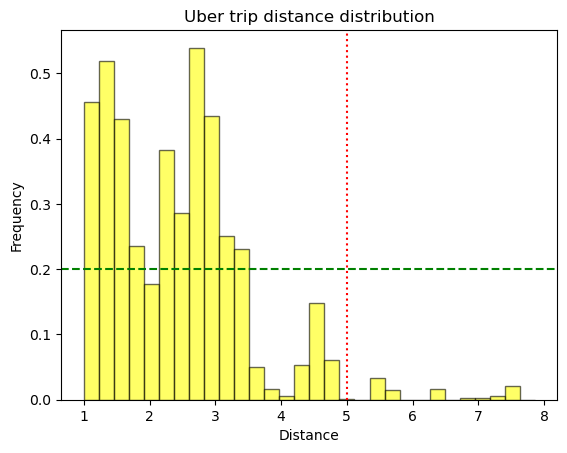

In [25]:
plt.hist(rides_uber['distance'],color='yellow',edgecolor='black',bins=30,density=True,alpha=0.6)

plt.title("Uber trip distance distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.axvline(x=5, color="red", linestyle=":")
plt.axhline(y=0.2,color="green", linestyle="--")

plt.show()

Note that we can add a vertical line, to help visualize the total frequency to the left/right of a certain value; also a horizontal line to find the ranges of distances with a frequency below a certain value. 

We can add Lyft's distance into the same chart.

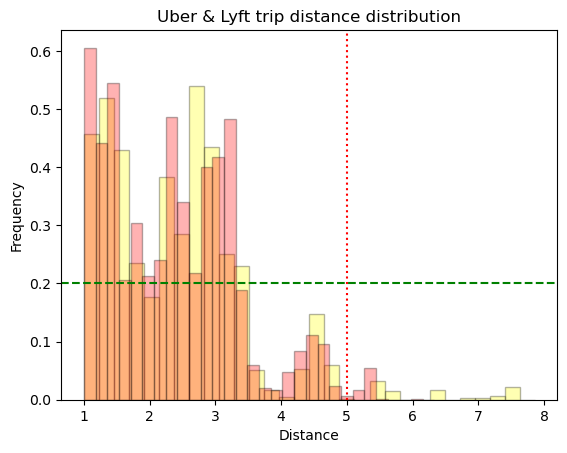

In [32]:
plt.hist(rides_uber['distance'],color='yellow',edgecolor='black',bins=30,density=True,alpha=0.3)
plt.hist(rides_lyft['distance'],color='red',edgecolor='black',bins=30,density=True,alpha=0.3)

plt.title("Uber & Lyft trip distance distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.axvline(x=5, color="red", linestyle=":")
plt.axhline(y=0.2,color="green", linestyle="--")

plt.show()

**Notes**:
1. In addition to specifying the number of bins, we can also:
    * use a list to specify the edge locations of each bin
        - try to set `bin_edge=[0,2,4,6,8,10,12,14,16,18]`, and then use `bins=bin_edge` in `plt.hist()`
        - automatically generate the bins by setting `bins=` to one of the pre-defined string values ('auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'), which correspond to some pre-set methods. See [numpy.histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges) for details.
2. See the documentation of pyplot for the [available color codes](https://matplotlib.org/stable/gallery/color/named_colors.html).

# Using the boxplot

Let's visualize Uber's per-mile prices using a boxplot (aka., ).

In `matplotlib.pyplot`, the function `boxplot()` creates boxplots.

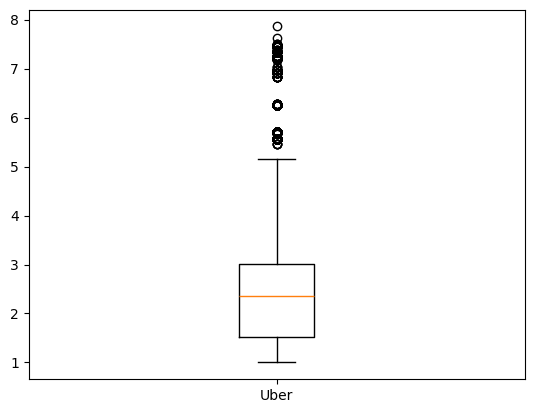

In [31]:
# Create a boxplot for Uber's trip distances

plt.boxplot(rides_uber['distance'])

plt.xticks([1],['Uber'])
plt.show()

**Question**: How do we interpret the boxplot?

* The orange line in the center represents the median. 
* The top and bottom edge indicates the 1st quartile (Q1, 25th percentile) and 3rd quartile (Q3, 75th percentile).
    * The difference Q3-Q1 is called the interquartile range (IQR)
* The "whiskers" extends:
    * upwards to the max point within 1.5 x IQR above Q3
    * downwards to the min point within 1.5 x IQR below Q1

In [35]:
# Calculate Q1, median, and Q3
Qs = rides_uber['distance'].quantile([0.25,0.5,0.75])
Qs

0.25    1.51
0.50    2.35
0.75    3.01
Name: distance, dtype: float64

In [36]:
# Calculate Q1, median, Q3, IQR, upper and lower whiskers

q1 = Qs.iloc[0]
q2 = Qs.iloc[1]
q3 = Qs.iloc[2]

iqr = q3-q1

lw = q1-1.5*iqr
uw = q3+1.5*iqr

print(q1,q2,q3,lw,uw)

1.51 2.35 3.01 -0.7399999999999995 5.26


Now let's include the plots for both Uber and Lyft trips.

To create multiple boxplots in the same chart, the input argument will be a list of variables.

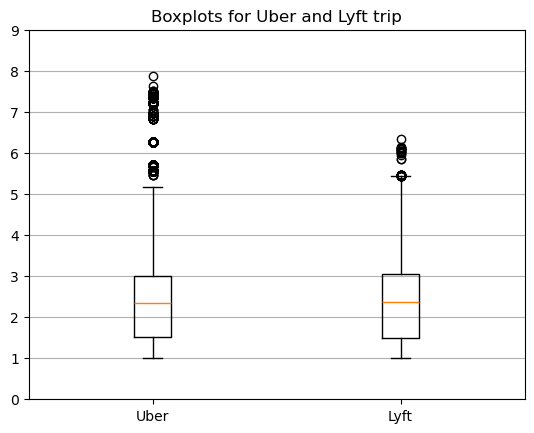

In [44]:
plt.boxplot([rides_uber['distance'],rides_lyft['distance']])

plt.xticks([1,2],['Uber','Lyft'])
plt.yticks(range(10))

plt.title("Boxplots for Uber and Lyft trip")

plt.grid(axis='y')
plt.show()

Based on the boxplot, what insights can we get?